In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('dmis-lab/biobert-large-cased-v1.1')

import csv
import statistics
import matplotlib.pyplot as plt; plt.rcdefaults()

In [2]:
x = tokenizer.tokenize('here we go again')

In [3]:
fig_example = tokenizer.tokenize('Six newborns were diagnosed with classic homocystinuria with an incidence of 1:50,000, which is not as high as in Qatar but higher than the global incidence.')
fig_example

['six',
 'newborn',
 '##s',
 'were',
 'diagnosed',
 'with',
 'classic',
 'hom',
 '##oc',
 '##ys',
 '##tin',
 '##uria',
 'with',
 'an',
 'incidence',
 'of',
 '1',
 ':',
 '50',
 ',',
 '000',
 ',',
 'which',
 'is',
 'not',
 'as',
 'high',
 'as',
 'in',
 'qa',
 '##tar',
 'but',
 'higher',
 'than',
 'the',
 'global',
 'incidence',
 '.']

In [4]:
len(fig_example)

38

In [5]:
x

['here', 'we', 'go', 'again']

In [6]:
def get_stats(name):
    len_tokens = []
    
    with open(name+".tsv",'r', encoding="utf-8") as f:
        reader = csv.reader(f, delimiter="\t")
        sentence_tokens=[]
        for row in reader:
            if len(row)%2==0:
                if row == None or len(row)==0:
                    abstract = ' '.join(sentence_tokens)
                    len_tokens.append(len(tokenizer.tokenize(abstract)))
                    sentence_tokens.clear()
                else:
                    sentence_tokens.append(row[0])
    f.close()

    print('max: ',max(len_tokens))
    print('min: ',min(len_tokens))
    print('mean: ',statistics.mean(len_tokens))
    print('standard deviation: ',statistics.stdev(len_tokens))
    print('median: ',statistics.median(len_tokens))
    
    fig = plt.figure()
    plt.ylabel('# of Abstracts')
    plt.xlabel('# of Tokens')
    plt.hist(len_tokens)

    plt.show()

    Cutoff = statistics.mean(len_tokens)+2*statistics.stdev(len_tokens)
    #Find out what is a good cutoff that gets ~95% of all abstracts
    print('% covered fully by cutoff: ',len([x for x in len_tokens if x<=Cutoff])/len(len_tokens))
    print('cutoff: ',Cutoff)
    
    custom = int(input("Input custom int cut-off: "))
    print('% covered fully by cutoff: ',len([x for x in len_tokens if x<=custom])/len(len_tokens))

max:  225
min:  1
mean:  32.541903063705625
standard deviation:  18.004473332936968
median:  29


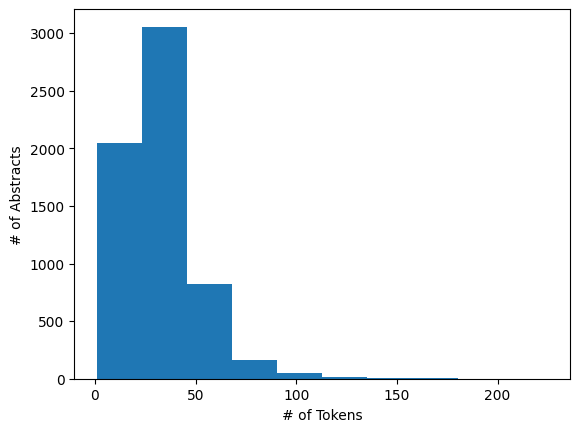

% covered fully by cutoff:  0.9594747933214459
cutoff:  68.55084972957957
Input custom int cut-off: 128
% covered fully by cutoff:  0.9967579834657156


In [7]:
get_stats("epi_gold_set")